In [37]:
from openseespy.opensees import *
import numpy as np
import matplotlib.pyplot as plt
import opsvis as opsv

In [38]:
wipe()
model('basic', '-ndm', 2, '-ndf', 2)

In [39]:
# create nodes
nodes = [[0,0],[3,0],[6,0],[9,0],[3,3],[6,3]]
for i, coordinate in enumerate(nodes):
    node(i+1, *coordinate)

<Axes: >

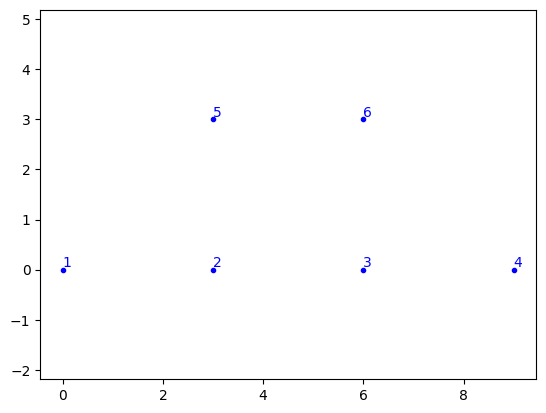

In [40]:
opsv.plot_model()

In [41]:
fix(1, 1, 1)
fix(4, 0, 1)

In [42]:
# define materials
uniaxialMaterial("Elastic", 1, 200e3)

In [43]:
# define elements => element('Truss', eleTag, *eleNodes, A, matTag)
element("Truss",1,1,2,300.0,1)
element("Truss",2,2,3,300.0,1)
element("Truss",3,3,4,300.0,1)
element("Truss",4,1,5,300.0,1)
element("Truss",5,2,5,300.0,1)
element("Truss",6,2,6,300.0,1)
element("Truss",7,3,6,300.0,1)
element("Truss",8,4,6,300.0,1)
element("Truss",9,5,6,300.0,1)

<Axes: >

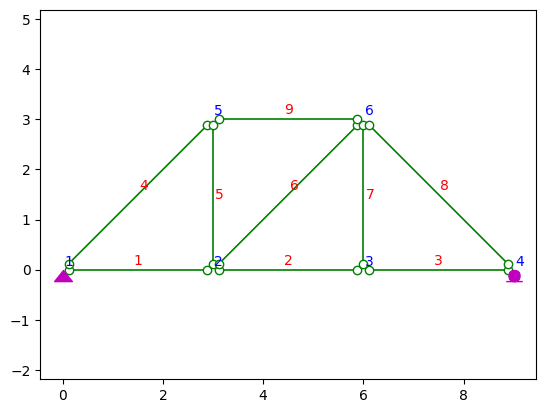

In [44]:
opsv.plot_model()

In [45]:
timeSeries('Linear', 1)
pattern('Plain', 1, 1)
sp(3, 2, -0.006162)

In [46]:
# create SOE
system("BandSPD")

# create DOF number
numberer("RCM")

# create constraint handler
constraints('Penalty', 1.0e12, 1.0e12)

# create integrator
integrator("DisplacementControl", 3, 2, -0.000001)

# create algorithm
algorithm("Linear")

# create analysis object
analysis("Static")

# perform the analysis
analyze(6162)

0

In [47]:
u_cy = nodeDisp(3, 2)
print(f"The vertical displacement at node C is {u_cy*1000:.3f} mm.")
u_by = nodeDisp(2, 2)
print(f"The vertical displacement at node B is {u_by*1000:.3f} mm.")

The vertical displacement at node C is -6.162 mm.
The vertical displacement at node B is -3.081 mm.


In [67]:
reactions()
r_ay = nodeReaction(1,2)
print(f"The vertical force at node A is {r_ay/1000:.2f} kN.")

The vertical force at node A is 10.00 kN.


146.05647517038753

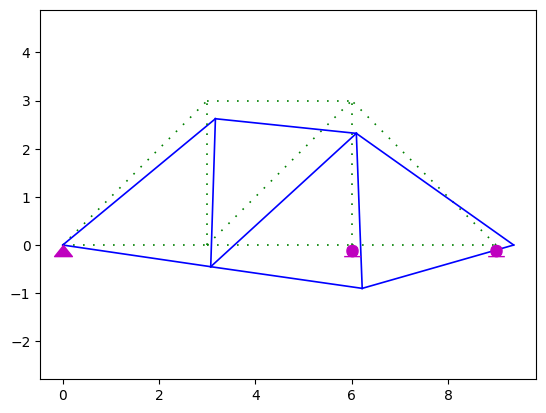

In [48]:
opsv.plot_defo()